In [1]:
%matplotlib inline
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools

Using TensorFlow backend.


In [2]:
# Pour importer le datasets mnist de Keras
from keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:',y_train.shape)

Shape of X: (60000, 784)
Shape of y: (60000,)


In [3]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

> L'architecture du LeNet est constituée des couches suivantes:
>> * **Convolution 1** : 30 filtres,  dimension d'entrée (28, 28, 1), dimension du noyau (5, 5), fonction d'activation *ReLU*, pas de dépassement du noyau.
>> * **Max-Pooling 1** : dimension du pooling (2, 2).
>>
>> * **Convolution 2** : 16 filtres, dimension du noyau (3, 3), fonction d'activation *ReLU*, Pas de dépassement du noyau.
>> * **Max-Pooling 2** : dimension du pooling (2, 2).
>>
>> * **Dropout** : Connexions coupées: 20%.
>> * **Aplatissement**
>> * **Dense 1** : 128 neurones, fonction d'activation *ReLU*.
>> * **Dense 2** :  10 neurones, fonction d'activation *softmax*.
>
>  En image: <img src="https://datascientest.fr/train/assets/le_net.png" style="width:auto; height:200px" />

* Instancier l'ensemble de ces couches et les ajouter à un modèle séquentiel.


* Compiler le modèle avec la fonction de perte *'categorical_crossentropy'*, l'optimiseur *'adam'* et la métrique *["accuracy"]*.


* Entraîner le modèle avec les données d'entraînement sur 16 *epochs* avec des *batchs* de taille 200 et un *split* de validation de 0,2. Stocker la sortie de l'entraînement dans une variable nommée **training_history_lenet**.



In [4]:
# Architecture du modèle
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 1),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 10,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)

lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

# Entraînement_1
training_history_lenet = lenet.fit(X_train, y_train,          # données
                                   validation_split = 0.2,    # split de validation
                                   epochs = 16,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs

Train on 48000 samples, validate on 12000 samples
Epoch 1/16
48000/48000 [==============================] - 20s 415us/step - loss: 0.4343 - accuracy: 0.8692 - val_loss: 0.1139 - val_accuracy: 0.9671
Epoch 2/16
48000/48000 [==============================] - 20s 422us/step - loss: 0.1136 - accuracy: 0.9656 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 3/16
48000/48000 [==============================] - 20s 416us/step - loss: 0.0795 - accuracy: 0.9759 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 4/16
48000/48000 [==============================] - 19s 390us/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0512 - val_accuracy: 0.9849
Epoch 5/16
48000/48000 [==============================] - 22s 453us/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0461 - val_accuracy: 0.9863
Epoch 6/16
48000/48000 [==============================] - 21s 437us/step - loss: 0.0468 - accuracy: 0.9857 - val_loss: 0.0437 - val_accuracy: 0.9870
Epoch 7/16
48000/48000 [==============================] 

In [5]:
train_acc_lenet = training_history_lenet.history['accuracy']
val_acc_lenet = training_history_lenet.history['val_accuracy']

In [6]:
# COMPARAISON DES 3 RESEAUX DENSE, CNN et LENET
# Réseau Dense

dense = Sequential()
dense_0 = Flatten()
dense_1 = Dense(units = 20, input_dim = 784, kernel_initializer ='normal', activation ='tanh')            
dense_2 = Dense(units = 10, kernel_initializer ='normal', activation ='softmax')
dense.add(dense_0)
dense.add(dense_1)
dense.add(dense_2)

# CNN

cnn = Sequential()
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', input_shape = (28, 28, 1), activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Dropout(rate = 0.2)
cnn_4 = Flatten()
cnn_5 = Dense(units = 128, activation = 'relu')
cnn_6 = Dense(units = 10, activation='softmax')

cnn.add(cnn_1)
cnn.add(cnn_2)
cnn.add(cnn_3)
cnn.add(cnn_4)
cnn.add(cnn_5)
cnn.add(cnn_6)

# Compilation
dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])           
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            

# Entraînement
training_history_dense = dense.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)
training_history_cnn = cnn.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/16
48000/48000 [==============================] - 1s 13us/step - loss: 1.1820 - accuracy: 0.7795 - val_loss: 0.5608 - val_accuracy: 0.8915
Epoch 2/16
48000/48000 [==============================] - 0s 10us/step - loss: 0.4574 - accuracy: 0.8963 - val_loss: 0.3550 - val_accuracy: 0.9137
Epoch 3/16
48000/48000 [==============================] - 1s 10us/step - loss: 0.3384 - accuracy: 0.9122 - val_loss: 0.2941 - val_accuracy: 0.9221
Epoch 4/16
48000/48000 [==============================] - 1s 12us/step - loss: 0.2894 - accuracy: 0.9214 - val_loss: 0.2637 - val_accuracy: 0.9275
Epoch 5/16
48000/48000 [==============================] - 1s 17us/step - loss: 0.2596 - accuracy: 0.9281 - val_loss: 0.2441 - val_accuracy: 0.9337
Epoch 6/16
48000/48000 [==============================] - 0s 10us/step - loss: 0.2389 - accuracy: 0.9330 - val_loss: 0.2294 - val_accuracy: 0.9370
Epoch 7/16
48000/48000 [==============================] - 0s 10us/st

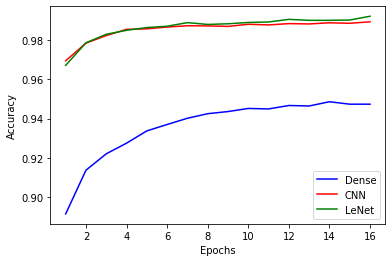

In [7]:
val_acc_dense = training_history_dense.history['val_accuracy']
val_acc_cnn = training_history_cnn.history['val_accuracy']

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe du score de validation du réseau Dense
plt.plot(np.arange(1 , 17, 1),
         val_acc_dense,
         label = 'Dense',
         color = 'blue')

# Courbe du score de validation du réseau CNN
plt.plot(np.arange(1 , 17, 1),
         val_acc_cnn, 
         label = 'CNN',
         color = 'red')

# Courbe du score de validation du réseau LeNet
plt.plot(np.arange(1 , 17, 1),
         val_acc_lenet, 
         label = 'LeNet',
         color = 'green')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

In [8]:
test_pred_lenet = lenet.predict(X_test)
test_pred_dense = dense.predict(X_test)
test_pred_cnn = cnn.predict(X_test)

test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)
test_pred_dense_class = test_pred_dense.argmax(axis = 1)
test_pred_cnn_class = test_pred_cnn.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_lenet_class))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



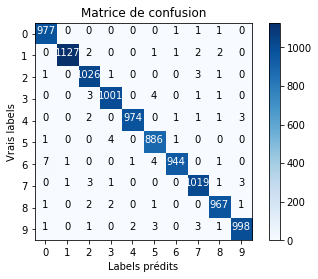

In [12]:
#Réponse valable:
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_lenet_class)
#print(cnf_matrix)

###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

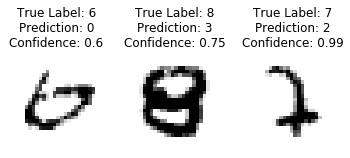

In [9]:
#une représentation de chiffre où les 3 modèles se sont trompés
error_indexes = []
for i in range(len(test_pred_cnn)):
    if (test_pred_lenet_class[i] != y_test_class[i]):
        if(test_pred_dense_class[i] != y_test_class[i]):
            if(test_pred_cnn_class[i] != y_test_class[i]):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))